# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Loading-the-dataset" data-toc-modified-id="Loading-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading the dataset</a></div><div class="lev1 toc-item"><a href="#NPSC-implementation" data-toc-modified-id="NPSC-implementation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NPSC implementation</a></div><div class="lev2 toc-item"><a href="#npsc-categories-definition" data-toc-modified-id="npsc-categories-definition-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>npsc categories definition</a></div><div class="lev3 toc-item"><a href="#drinks---cat-1" data-toc-modified-id="drinks---cat-1-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>drinks - cat 1</a></div><div class="lev3 toc-item"><a href="#others---cat-2" data-toc-modified-id="others---cat-2-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>others - cat 2</a></div><div class="lev3 toc-item"><a href="#oil\butter\margarine---cat-3" data-toc-modified-id="oil\butter\margarine---cat-3-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>oil\butter\margarine - cat 3</a></div><div class="lev3 toc-item"><a href="#special-cheese---cat-3" data-toc-modified-id="special-cheese---cat-3-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>special cheese - cat 3</a></div><div class="lev4 toc-item"><a href="#spot-outliers-in-calcium" data-toc-modified-id="spot-outliers-in-calcium-2141"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>spot outliers in calcium</a></div><div class="lev4 toc-item"><a href="#find-right-items" data-toc-modified-id="find-right-items-2142"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>find right items</a></div><div class="lev2 toc-item"><a href="#summary-of-categories-assignment" data-toc-modified-id="summary-of-categories-assignment-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>summary of categories assignment</a></div><div class="lev2 toc-item"><a href="#baseline-points" data-toc-modified-id="baseline-points-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>baseline points</a></div><div class="lev2 toc-item"><a href="#fruit-and-veg.-points---TO-BE-IMPROVED" data-toc-modified-id="fruit-and-veg.-points---TO-BE-IMPROVED-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>fruit and veg. points - TO BE IMPROVED</a></div><div class="lev3 toc-item"><a href="#rules" data-toc-modified-id="rules-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>rules</a></div><div class="lev3 toc-item"><a href="#parse-info---STILL-MISSING-NON-CONC" data-toc-modified-id="parse-info---STILL-MISSING-NON-CONC-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>parse info - STILL MISSING NON-CONC</a></div><div class="lev3 toc-item"><a href="#v-points-computation" data-toc-modified-id="v-points-computation-243"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>v-points computation</a></div><div class="lev2 toc-item"><a href="#proteins-points" data-toc-modified-id="proteins-points-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>proteins points</a></div><div class="lev2 toc-item"><a href="#fiber-points" data-toc-modified-id="fiber-points-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>fiber points</a></div><div class="lev3 toc-item"><a href="#spot-Fiber-outliers" data-toc-modified-id="spot-Fiber-outliers-261"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>spot Fiber outliers</a></div><div class="lev2 toc-item"><a href="#final-npsc-score" data-toc-modified-id="final-npsc-score-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>final npsc score</a></div><div class="lev2 toc-item"><a href="#final-npsc--criterion" data-toc-modified-id="final-npsc--criterion-28"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>final npsc  criterion</a></div><div class="lev2 toc-item"><a href="#save-all-work-in-the-dataframe" data-toc-modified-id="save-all-work-in-the-dataframe-29"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>save all work in the dataframe</a></div><div class="lev1 toc-item"><a href="#Statistics" data-toc-modified-id="Statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics</a></div><div class="lev1 toc-item"><a href="#OTHER-CODE" data-toc-modified-id="OTHER-CODE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>OTHER CODE</a></div>

In [1]:
#  generic packages 
import pandas as pd
import numpy as np
import gc 
# plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# interacting plotting
# from bokeh.plotting import figure, output_file, show

# packages for stats
from scipy import stats
import powerlaw
import itertools as itt

# Loading the dataset

In [145]:
food_df = pd.read_csv('nutr_&_categ.csv')

remove legacy index cols

In [146]:
food_df.drop(['Unnamed: 0', 'Unnamed: 0.1'],inplace=True,axis=1)

# NPSC implementation

 step=by-step explanation of the [AUS/NZ system](http://www.foodstandards.gov.au/industry/labelling/Documents/Short-guide-for-industry-to-the-NPSC.pdf) - see nice diagram on page 6

for the calculation of the different points, see [these tables](https://www.legislation.gov.au/Details/F2017C00719)
( NPSC = Nutrient Profiling Scoring Criterion)

## npsc categories definition

there are 3 main super-categories: 

- drinks (CAT 1) --> `drink`
- cheese or processed cheese with >320mg calcium/100g; edible oil, edible oil spread; margarine
or butter (CAT 2) --> `edible_fats`
- all the rest (CAT 3)

we simply initialize this category with the ones from nutri-score

In [148]:
food_df['npsc_cat'] = food_df.ns_category

food_df.npsc_cat.value_counts()

solid    18293
drink     2834
Name: npsc_cat, dtype: int64

### drinks - cat 1

this category was already assigned in the  `nutriscore_&_diets_analysis` notebook

drinks have all `ml` unit - vic. is not true as we excluded soups and sauces -- hereby double checked

In [149]:
sum(food_df.unit[food_df.ns_category=='drink']!='ml')

0

check distribution of sizes to spot eventual outliers

(-1, 10)

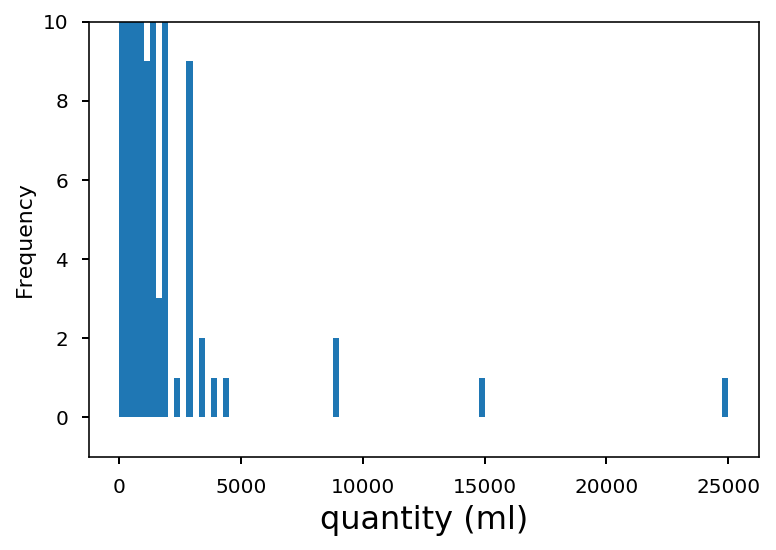

In [7]:
food_df.quantity[food_df.ns_category=='drink'].plot.hist(bins=100)

plt.xlabel('quantity (ml)',size=16)

plt.ylim([-1,10])

In [7]:
food_df.loc[(food_df.unit=='ml') & (food_df.quantity>5000),['barcode','name']]

,barcode,name
12626,7610124206306,NaN
13822,7610057312662,NaN
17786,76119019,Lipton lemon ice tea
20533,3502110006790,Format Familial Tropicana pure Premnuim Orange...


only last two are actually errors - now fixed in the FR db 

(the others refer to the quantity of the _barcoded product_ , which can be e.g a package of 6 bottles - 6 * 1.5 L = 9000 mL)

assign `cat_1` to drinks

In [150]:
food_df.npsc_cat[food_df.npsc_cat=='drink'] = 'cat_1'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### others - cat 2

In [151]:
food_df.npsc_cat[food_df.npsc_cat=='solid'] = 'cat_2'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### oil\butter\margarine - cat 3

In [152]:
fats_list = [' beurre ',' burro ',' butter ',
               ' huile ',' olio ',' Öl ',
               ' margarine ',' margarina '] # german == french

not_fats = ['walkers','biscuit','choco','schoko','tresse','pandoro','chicken','milk','pomodori',
           'popcorn','crisp','chips','brioche','funghi','ficelle','amande','pastetli','fudge','sabl',
           'cuchaule','aubergine','tartuf','cook','waffle','salmone','ice cream','pesto',
           'fluette','flute','tengeli','petit','caramel','carciof','toast','madeleine']

In [153]:
for row in food_df.itertuples():
    
    if type(row.name) == str:           
        if (any(trans in row.name.lower() for trans in fats_list)) and\
        (not any(bad in row.name.lower() for bad in not_fats)):
                
#                 print(row.name) #just a ckeck...

            food_df.npsc_cat[row.Index] = 'cat_3'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [154]:
#  cleaning useless vars
del not_fats
gc.collect()

0

### special cheese - cat 3

according to [NPSC guidelines](http://www.foodstandards.gov.au/industry/labelling/Documents/Short-guide-for-industry-to-the-NPSC.pdf), 
cheese with __more than 320 mg of calcium__ goes in the same category of other fat products

In [11]:
# total N of products with clacium > 320 mg / 100g
sum(food_df.Calcium>320)

110

#### spot outliers in calcium

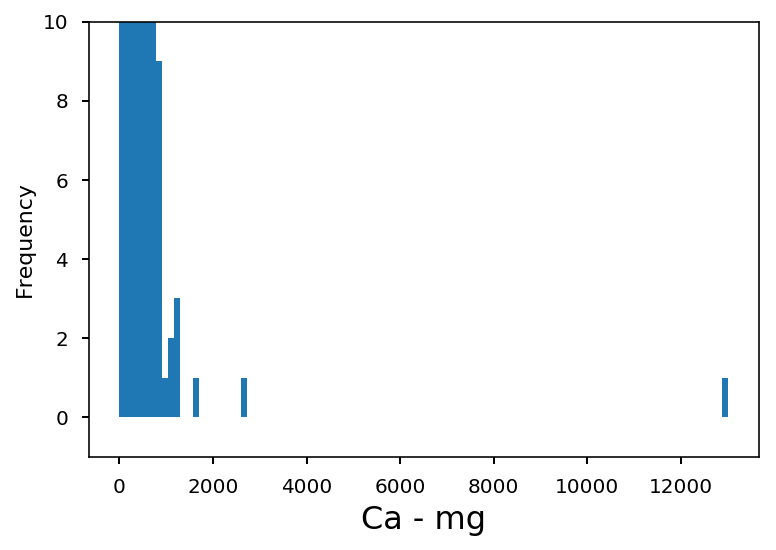

In [14]:
food_df.Calcium.plot.hist(bins=100)


plt.xlabel('Ca - mg',size=16)
plt.ylim([-1,10]);

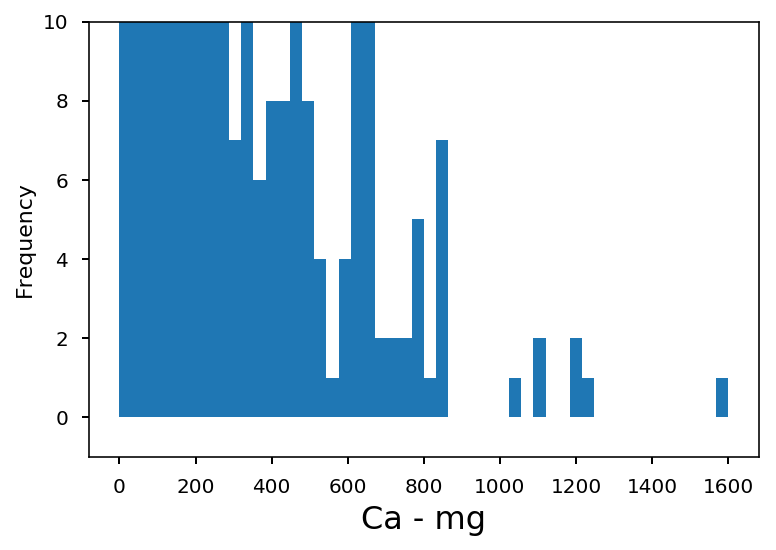

In [15]:
food_df.Calcium[ (food_df.Calcium < 2000)].plot.hist(bins=50)

plt.xlabel('Ca - mg',size=16)
plt.ylim([-1,10]);

1000 mg seems to be a interesting threshold...

In [16]:
food_df.loc[food_df.Calcium > 1000,['Calcium','name','barcode']]

,Calcium,name,barcode
2325,1106.0,NaN,3387390406719
2407,1200.0,Actilife Vitalzin,7610121600510
11299,1100.0,Sponser Sport Food Fit&Well Lady Protein,7611174610327
11661,1200.0,Actilife Vitalzin,7613269185970
12524,2665.0,Jemalt,7612100055694
14150,1600.0,Migros Fit Control Ergänzung Low Carb Proteind...,7613269303879
14317,1030.0,Leerdammer Lightlife,8721800021294
15104,1230.0,NaN,5900020026163
15562,13016.0,NaN,4009700028198


[last item](https://www.foodrepo.org/ch/products/17736) was a mistake and has been corrected - the others are not tsx mistakes

#### find right items

In [160]:
not_cheese = ['cereal','aproz','banane','amende','amande', 'nestl','nescafe',
              'actilife','sport','choco','balisto','milupa','milk','milch','eimalzin',
             'souffl','jemalt','ovo','drink','suppe','biscuit','crunchy']

In [161]:
c = 0 # just a counter

for row in food_df.itertuples():
    
    if type(row.name) == str:
        
        if (row.Calcium > 320) and (row.unit=='g') and\
        (not any(bad in row.name.lower() for bad in not_cheese)):
            
#             print(row.name,row.barcode) #just a ckeck...
            c += 1

            food_df.npsc_cat[row.Index] = 'cat_3'
c

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


41

In [162]:
# cleaning useless var
del not_cheese
gc.collect()

0

## summary of categories assignment

In [165]:
food_df.npsc_cat.value_counts()

cat_2    18214
cat_1     2821
cat_3       92
Name: npsc_cat, dtype: int64

## baseline points

In [166]:
def energy_12(my_energy_KJ):
    
    if my_energy_KJ > 3350:
        return 10
    elif my_energy_KJ > 3015:
        return 9
    elif my_energy_KJ > 2680:
        return 8
    elif my_energy_KJ > 2345:
        return 7
    elif my_energy_KJ > 2010:
        return 6
    elif my_energy_KJ > 1675:
        return 5
    elif my_energy_KJ > 1340:
        return 4    
    elif my_energy_KJ > 1005:
        return 3
    elif my_energy_KJ > 670:
        return 2
    elif my_energy_KJ > 335:
        return 1
    else:
        return 0

In [167]:
def sat_fat_12(my_sat_fat):

    if   my_sat_fat > 10:
        return 10
    elif   my_sat_fat > 9:
        return 9
    elif   my_sat_fat > 8:
        return 8
    elif   my_sat_fat > 7:
        return 7
    elif   my_sat_fat > 6:
        return 6
    elif   my_sat_fat > 5:
        return 5  
    elif   my_sat_fat > 4:
        return 4
    elif   my_sat_fat > 3:
        return 3
    elif   my_sat_fat > 2:
        return 2
    elif   my_sat_fat > 1:
        return 1
    else:
        return 0

In [168]:
# mind that sugar points are the same ...
# ...for all three categories!
def sugars_points(my_sugars):
    
    if my_sugars > 45:
        return 10
    elif my_sugars > 40:
        return 9
    elif my_sugars > 36:
        return 8
    elif my_sugars > 31:
        return 7
    elif my_sugars > 27:
        return 6
    elif my_sugars > 22.5:
        return 5
    elif my_sugars > 18:
        return 4    
    elif my_sugars > 13.5:
        return 3
    elif my_sugars > 9:
        return 2
    #this was the only difference:
    #     NS: 4.5 --> NPSC: 5
    elif my_sugars > 5:
        return 1
    else:
        return 0

In [169]:
def sodium_12(my_sodium):
    
    if my_sodium > 900:
        return 10
    elif my_sodium > 810:
        return 9
    elif my_sodium > 720:
        return 8
    elif my_sodium > 630:
        return 7
    elif my_sodium > 540:
        return 6
    elif my_sodium > 450:
        return 5
    elif my_sodium > 360:
        return 4    
    elif my_sodium > 270:
        return 3
    elif my_sodium > 180:
        return 2
    elif my_sodium > 90:
        return 1
    else:
        return 0

In [170]:
def energy_3(my_energy_KJ):
    
    if my_energy_KJ   > 3685:
        return 11
    elif my_energy_KJ > 3350:
        return 10
    elif my_energy_KJ > 3015:
        return 9
    elif my_energy_KJ > 2680:
        return 8
    elif my_energy_KJ > 2345:
        return 7
    elif my_energy_KJ > 2010:
        return 6
    elif my_energy_KJ > 1675:
        return 5
    elif my_energy_KJ > 1340:
        return 4    
    elif my_energy_KJ > 1005:
        return 3
    elif my_energy_KJ > 670:
        return 2
    elif my_energy_KJ > 335:
        return 1
    else:
        return 0

In [171]:
def sat_fat_3(my_sat_fat):
    
    if   my_sat_fat > 30:
        return 30
    elif   my_sat_fat > 29:
        return 29
    elif   my_sat_fat > 28:
        return 28
    elif   my_sat_fat > 27:
        return 27
    elif   my_sat_fat > 26:
        return 26
    elif   my_sat_fat > 25:
        return 25  
    elif   my_sat_fat > 24:
        return 24
    elif   my_sat_fat > 23:
        return 23
    elif   my_sat_fat > 22:
        return 22
    elif   my_sat_fat > 20:
        return 20
    elif   my_sat_fat > 19:
        return 19
    elif   my_sat_fat > 18:
        return 18
    elif   my_sat_fat > 17:
        return 17
    elif   my_sat_fat > 16:
        return 16
    elif   my_sat_fat > 15:
        return 15  
    elif   my_sat_fat > 14:
        return 14
    elif   my_sat_fat > 13:
        return 13
    elif   my_sat_fat > 12:
        return 12
    elif   my_sat_fat > 11:
        return 11
    elif   my_sat_fat > 10:
        return 10
    elif   my_sat_fat > 9:
        return 9
    elif   my_sat_fat > 8:
        return 8
    elif   my_sat_fat > 7:
        return 7
    elif   my_sat_fat > 6:
        return 6
    elif   my_sat_fat > 5:
        return 5  
    elif   my_sat_fat > 4:
        return 4
    elif   my_sat_fat > 3:
        return 3
    elif   my_sat_fat > 2:
        return 2
    elif   my_sat_fat > 1:
        return 1
    else:
        return 0

In [172]:
def sodium_3(my_sodium):
    
    if   my_sodium > 2700:
        return 30
    elif my_sodium > 2610:
        return 29
    elif my_sodium > 2520:
        return 28
    elif my_sodium > 2430:
        return 27
    elif my_sodium > 2340:
        return 26
    elif my_sodium > 2250:
        return 25  
    elif my_sodium > 2160:
        return 24
    elif my_sodium > 2070:
        return 23
    elif my_sodium > 1980:
        return 22
    elif my_sodium > 1890:
        return 21
    elif my_sodium > 1800:
        return 20
    elif my_sodium > 1710:
        return 19
    elif my_sodium > 1620:
        return 18
    elif my_sodium > 1530:
        return 17
    elif my_sodium > 1440:
        return 16  
    elif my_sodium > 1350:
        return 15
    elif my_sodium > 1260:
        return 14
    elif my_sodium > 1170:
        return 13
    elif my_sodium > 1080:
        return 12
    elif my_sodium > 990:
        return 11    
    elif my_sodium > 900:
        return 10
    elif my_sodium > 810:
        return 9
    elif my_sodium > 720:
        return 8
    elif my_sodium > 630:
        return 7
    elif my_sodium > 540:
        return 6
    elif my_sodium > 450:
        return 5
    elif my_sodium > 360:
        return 4    
    elif my_sodium > 270:
        return 3
    elif my_sodium > 180:
        return 2
    elif my_sodium > 90:
        return 1
    else:
        return 0

In [173]:
food_df['b_points'] = pd.Series()

In [174]:
for row in food_df.itertuples():
    
    if (row.npsc_cat=='cat_1') | (row.npsc_cat=='cat_2'):
        
        food_df.loc[row.Index,'b_points'] = energy_12(row.Energy) + sat_fat_12(row.Saturated_fat) + \
                        sugars_points(row.Sugars) + sodium_12(row.Sodium)

    else:
        food_df.loc[row.Index,'b_points'] = energy_3(row.Energy) + sat_fat_3(row.Saturated_fat) + \
                        sugars_points(row.Sugars) + sodium_3(row.Sodium)

 distribution of baseline points

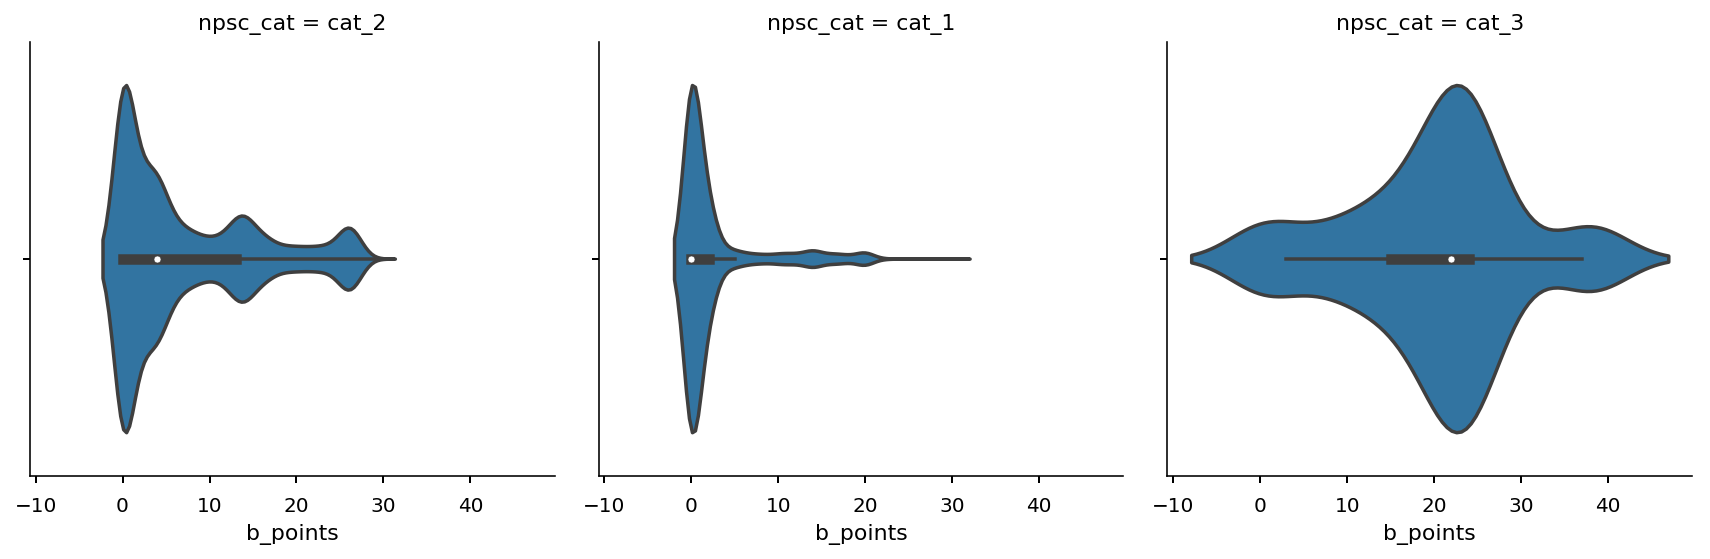

In [175]:
sns.factorplot(data=food_df,x='b_points', col='npsc_cat',kind='violin');

## fruit and veg. points - TO BE IMPROVED 

DISCLAIMER: this is the most  tough, annoying part... - still to be seen whether it's really useful...

### rules

terminology: _fvnl_ = fruits, vegetables, nuts and legumes

in order to compute v-points, we need:

- _non-concentrated fvnl_ 
- _concentrated_ fruits & veg.
- percentage of _non-fvnl ingredients_

mind that  - [from section S5-4](https://www.legislation.gov.au/Details/F2017C00719):

```
(2) V points cannot be scored for:

- (a)      a constituent, extract or isolate of a food mentioned in subsection (1); or
- (b)      cereal grains mentioned as a class of food in Schedule 22.                         
```

this means that _v-points_ are not assigned to products extract from fvnl (like peanut oil), but rather the opposite, products build _with fvnl_

to acutally compute the V-points, follow these rules:
    

(5) Use __Column 1__ of Table 3 if the fruit or vegetables in the food are __all concentrated__ (including dried).   
        Note    For example, if dried fruit and tomato paste are the components of the food for which V points can be scored, Column 1 should be used.
    
(6) Use __Column 2__ of Table 3 if:
- (a) there are no concentrated (or dried) fruit or vegetables in the food; or
- (b) the percentages of all concentrated ingredients are calculated based on the ingredient when reconstituted (according to subsection 1.2.10—4(3) or subsection 1.2.10—4(4)); or
- (c)      the food contains a mixture of concentrated fruit or vegetables and non-concentrated fvnl (after following the equation mentioned in subsection (8)); or
- (d)      the food is potato crisps or a similar low moisture vegetable product.

In [182]:
def fvnl_points(my_fvnl):
    
    if my_fvnl == 100:
        return 8
    elif my_fvnl > 80:
        return 5    
    elif my_fvnl > 60:
        return 2
    elif my_fvnl > 40:
        return 1
    else:
        return 0

In [196]:
def concen_fv_points(my_concen_fv):
    
    if my_concen_fv == 100:
        return 8
    elif my_concen_fv >= 67:
        return 5    
    elif my_concen_fv >= 43:
        return 2
    elif my_concen_fv >= 25:
        return 1
    else:
        return 0

### parse info - STILL MISSING NON-CONC

In [109]:
import re

In [176]:
conc_list = ['concentré','concentrato','konzentriert',
             'jus','succo','saft']

not_cont_list = ['veau']

In [178]:
# initialize percentage col
food_df['concen_perce'] = pd.Series()

In [179]:
for row in food_df.itertuples():
    
    if type(row.name) == str:           
        if (any(trans in row.name.lower() for trans in conc_list)) and (not any(bad in row.name.lower() for bad in not_cont_list)):

            # we assign by default 100 % -- this is wrong, since sometimes of course, the info is in the ingredients! 
            # -- ingredients are still not parsed              
            food_df.concen_perce[row.Index] = 100.0
    

#             print(row.name,row.barcode) #just a ckeck...
            
            # if there is %, then extract the info and assign it to the product
            if '%' in row.name.lower():   
                
                my_perc = re.findall('\d+\s*%',row.name.lower())
                
                food_df.concen_perce[row.Index] = np.float(my_perc[0].strip('%'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [186]:
# clean useless vars
del conc_list,not_cont_list
gc.collect()

10598

In [194]:
food_df.concen_perce.value_counts()

100.0    216
4.0        3
60.0       1
67.0       1
5.0        1
0.0        1
12.0       1
Name: concen_perce, dtype: int64

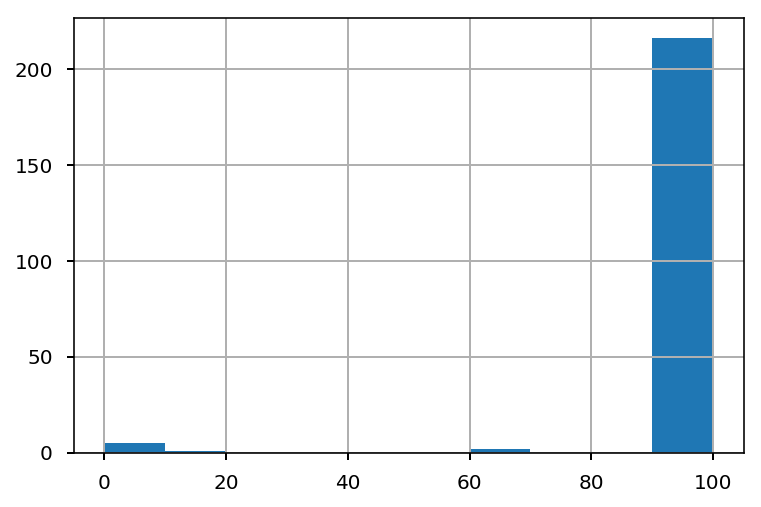

In [187]:
food_df.concen_perce.hist();

### v-points computation

In [197]:
# initilize all to 0
food_df['v_points'] = 0.0

In [199]:
# assign those ones with concentrated (or not) fvnl 
food_df.v_points = [concen_fv_points(row.concen_perce) for row in food_df.itertuples()]

In [200]:
food_df.v_points.value_counts()

0    20910
8      216
5        1
2        1
Name: v_points, dtype: int64

## proteins points

the following schema for F points is taken from [table 4, in the NPSC code](https://www.legislation.gov.au/Details/F2017C00719)

In [201]:
# THIS IS STILL WRONG
def protein_points(my_proteins):
    
    if my_proteins > 8.0:
        return 5
    elif my_proteins > 6.4:
        return 4    
    elif my_proteins > 4.8:
        return 3
    elif my_proteins > 3.2:
        return 2
    elif my_proteins > 1.6:
        return 1
    else:
        return 0

assignment of proteins points - keep in mind the [main diagram, at page 6](http://www.foodstandards.gov.au/industry/labelling/Documents/Short-guide-for-industry-to-the-NPSC.pdf) 

In [202]:
# case 1
prot_case_1 = (food_df.b_points < 13) | ((food_df.b_points >= 13) & (food_df.v_points >= 5))
food_df.loc[prot_case_1,'p_points'] = [protein_points(row.Protein) for row in food_df[prot_case_1].itertuples()]

# case 2
prot_case_2 = (food_df.b_points >= 13) & (food_df.v_points < 5)
food_df.loc[prot_case_2,'p_points'] = 0

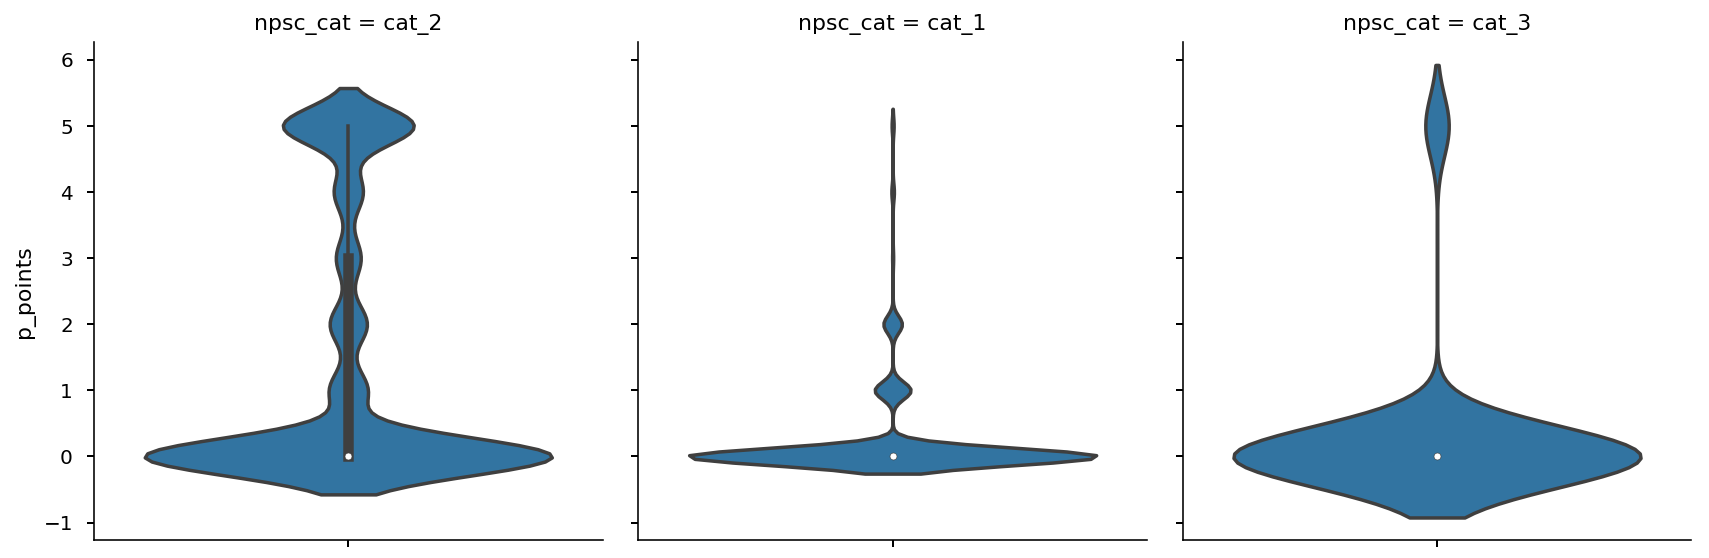

In [211]:
sns.factorplot(data=food_df,y='p_points',col='npsc_cat',kind='violin');

## fiber points

In [28]:
# all drinks have no fiber points - according to docs
food_df.loc[food_df.npsc_cat=='cat_1','f_points'] = 0

the following schema for F points is taken from [table 5, in the NPSC code](https://www.legislation.gov.au/Details/F2017C00719)

In [212]:
def fiber_points(my_fibers):
    
    if my_fibers > 4.7:
        return 5
    elif my_fibers > 3.7:
        return 4    
    elif my_fibers > 2.8:
        return 3
    elif my_fibers > 1.9:
        return 2
    elif my_fibers > 0.9:
        return 1
    else:
        return 0

In [213]:
food_df.loc[food_df.npsc_cat!='cat_1','f_points'] = [fiber_points(row.Fiber)\
                                                     for row in food_df[food_df.npsc_cat!='cat_1'].itertuples()]

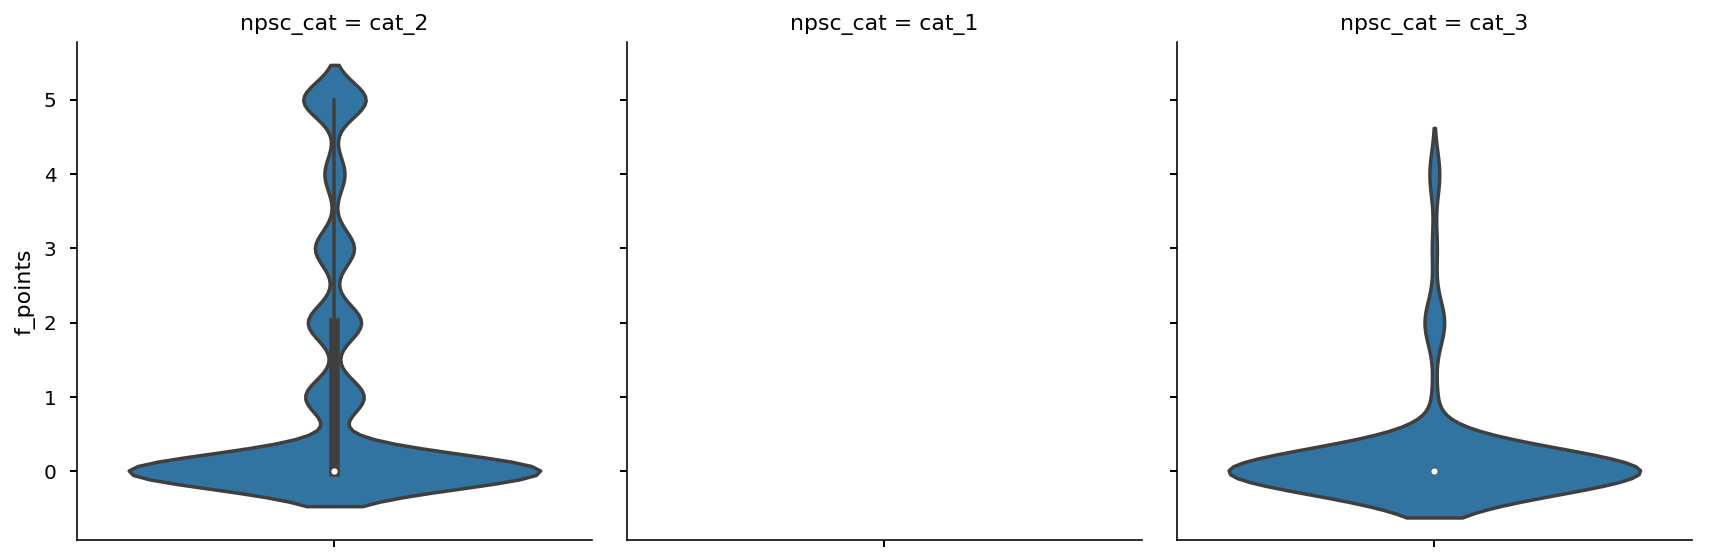

In [214]:
sns.factorplot(kind='violin',data=food_df,y='f_points',col='npsc_cat');

### spot Fiber outliers

[this outlier](https://www.foodrepo.org/ch/products/17905) and [this one](https://www.foodrepo.org/ch/products/19087), for instance have  been fixed 

In [74]:
food_df.loc[food_df.Fiber > 100,['name','barcode','Fiber']]

,name,barcode,Fiber
17399,NaN,20486396,470.0


we fix some db errors manually here - this has __to be deleted when using the latest dump__

In [78]:
food_df.Fiber[food_df.Fiber>100] = 47

food_df.Fiber[food_df.Fiber == 100] = 10

(-1, 100)

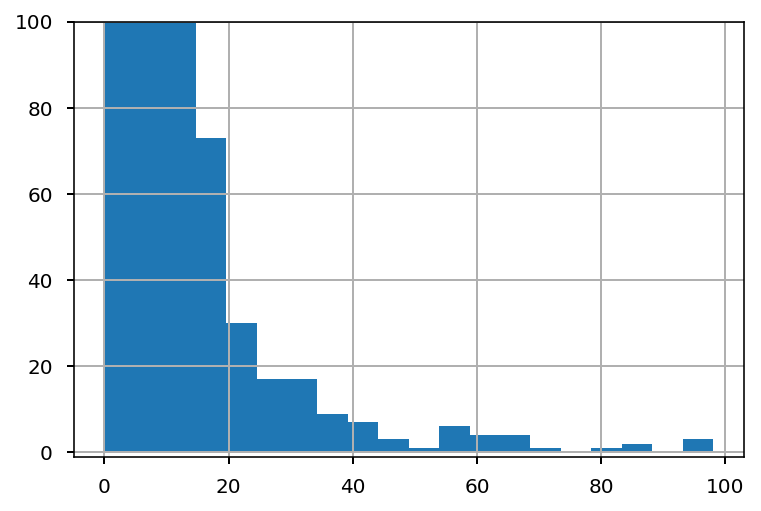

In [84]:
food_df.Fiber.hist(bins=20)

plt.ylim([-1,100])

## final npsc score 

In [215]:
food_df['npsc_score'] = food_df.b_points - food_df.v_points - food_df.p_points - food_df.f_points

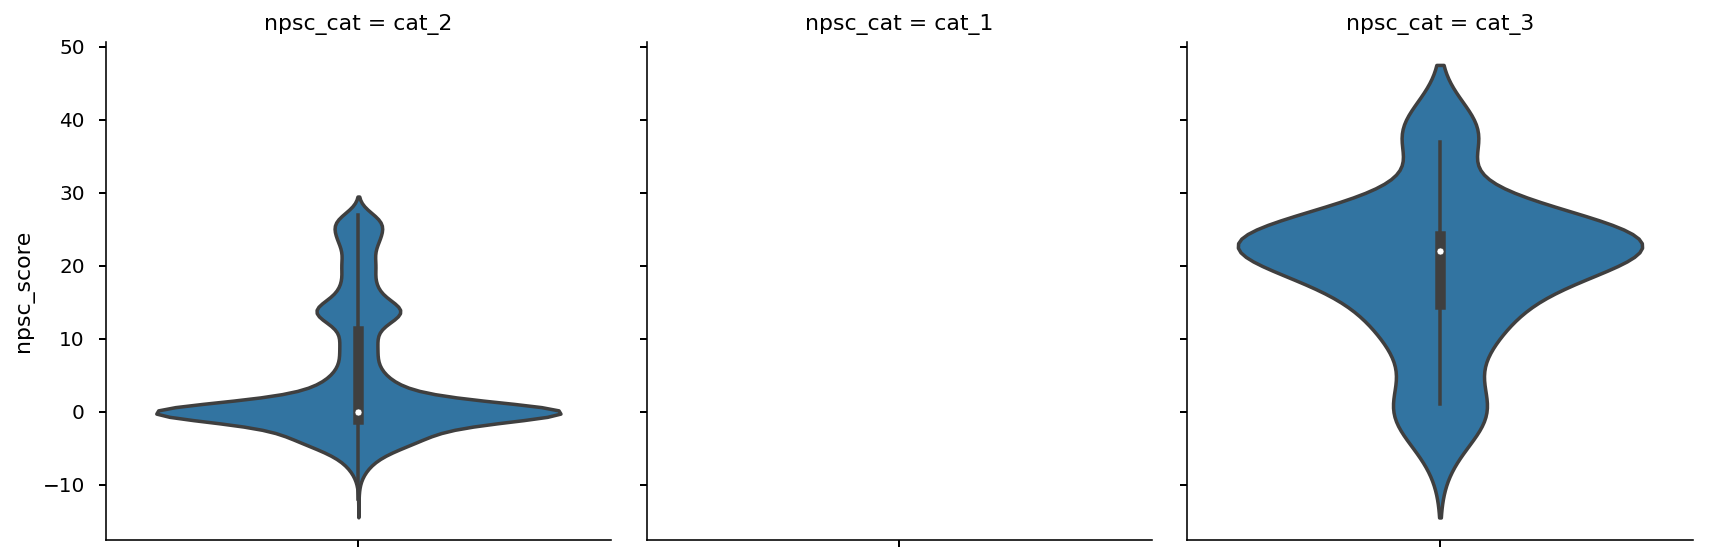

In [221]:
sns.factorplot(kind='violin',data=food_df,y='npsc_score',col='npsc_cat');

## final npsc  criterion

In [222]:
# intialise columns for  final decision: met VS non_met criterion for healthy food 
food_df['npsc_met'] = False

In [223]:
food_df.npsc_met[(food_df.npsc_cat=='cat_1') & (food_df.npsc_score < 1)] = True
food_df.npsc_met[(food_df.npsc_cat=='cat_2') & (food_df.npsc_score < 4)] = True
food_df.npsc_met[(food_df.npsc_cat=='cat_3') & (food_df.npsc_score < 28)] = True

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

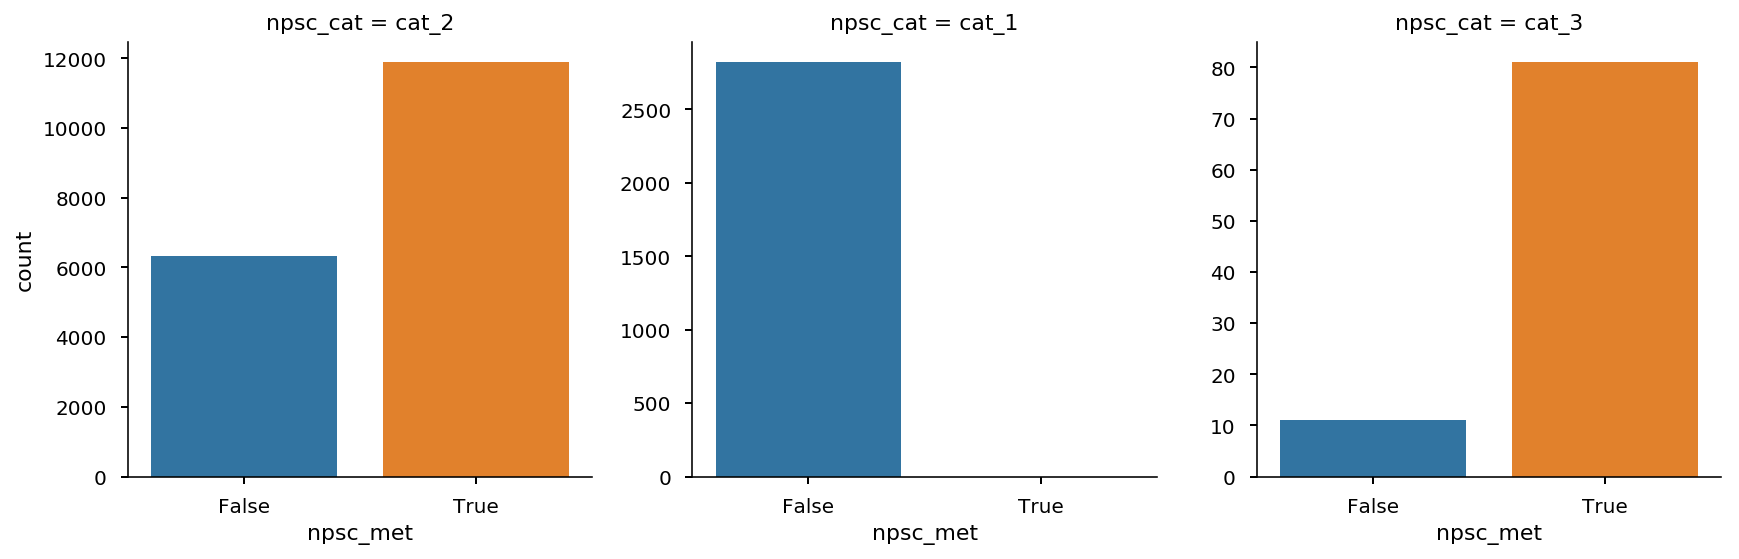

In [226]:
sns.factorplot(kind='count',data=food_df,x='npsc_met',col='npsc_cat',sharey=False);

## save all work in the dataframe

In [227]:
food_df.to_csv('./nutr_&_categ.csv')

# Statistics

# OTHER CODE